In [352]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint

##### Sistema de ecuaciones

$
\begin{equation}
\frac{dy}{dt} = -\frac{k_{1}}{v_{e}} \cdot y(t)
\end{equation}
$
$
\begin{equation}
\frac{dx}{dt} = \frac{k_{1}}{v_{e}} \cdot y(t) - \frac{k_{2}}{v_{s}} \cdot x(t)
\end{equation}
$

In [353]:
# Valores Iniciales
x0 = 0        # g/ml = mg/ml ; Cantidad inicial de alcohol en sangre
y0 = 0.24      # g/ml ; Cantidad inicial de alcohol en estómago asumiendo copas de 50ml
t0 = 1/3       # min  ; Tiempo de cada "shot" ingerido

# Constantes
k1 = 3        # ml * min^-1 ; Tasa de absorción
k2 = 6      # ml * min^-1 ; Tasa de eliminación
ve = 1      # ml          ; Volumen del estómago
vs = 5      # ml          ; Volumen de sangre

# 
n = 40      # Número de "shots" que va a ingerir.

# Configuración de la simulación.
step = 0.01 # Tamaño del "paso" en la simulación.

In [354]:
# Primera dosis
# tf =24 # Tiempo total de tratamiento [ horas ]
# t = np . arange (0 , tf , 0.01)

# fig, ax = plt.subplots(figsize=(10,5))
# y = -(k1/ve)*y0
# x = (k1/ve)*y0 - (k2/vs)*x0
# plt.plot (t , x , 'black')
# plt.xlabel ( r"Tiempo (horas) " )
# plt.ylabel ( r"Concentración ($\frac{mg}{L}$) " )
# plt.xlim(0, tf)
# plt.ylim(0)
# plt.grid(True)
# plt.title('Simulación para una sola dosis')


In [355]:
def model(c, t):
    y = c[0]
    x = c[1]
    dydt = -(k1/ve) * y
    dxdt = ((k1 / ve) * y) - ((k2/vs) * x)
    return np.array([dydt, dxdt])


dosis_arr_2 = np.array([np.arange(i*t0, (i*t0) + t0, step) for i in range(n)])
t = np.arange(0, t0, step)
ysol = []
c0 = np.array([y0, x0])

for i in range(len(dosis_arr_2)):
    ysol.append(odeint(model, c0, dosis_arr_2[i]))
    c0 = np.array([y0 + ysol[-1][-1][0], x0 + ysol[-1][-1][1]])

t = np.concatenate(dosis_arr_2)
y = np.concatenate(ysol)[ : ,0]
x = np.concatenate(ysol)[ : ,1]

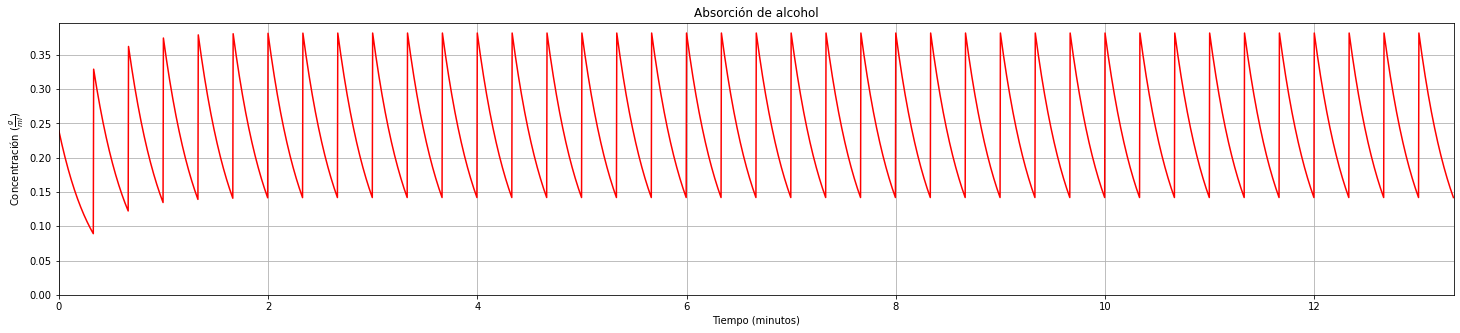

In [356]:
fig, ax = plt.subplots(figsize=(25,5))
plt.plot(t, y, 'r', label='Cantidad en estómago de amoxicilina')
plt.xlim(0, t0 * n)

plt.ylim(0)
plt.xlabel('Tiempo (minutos)')
plt.ylabel(r'Concentración ($\frac{g}{ml}$)')

plt.title('Absorción de alcohol')
plt.grid(True)

Text(0.5, 1.0, 'Modelo simulado de \nalcoholemia')

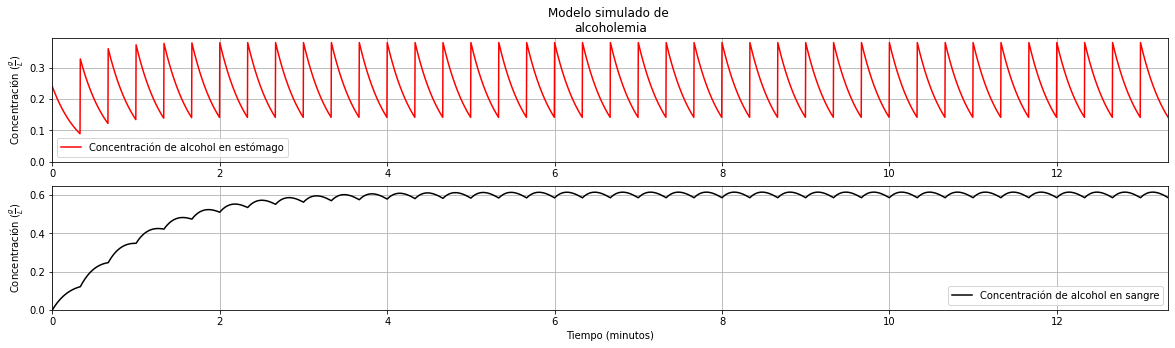

In [379]:
figure, axis = plt.subplots(2, 1, figsize=(20,5))
axis[0].plot(t, y, 'r', label='Concentración de alcohol en estómago')
axis[1].plot(t, x, 'k', label='Concentración de alcohol en sangre')

axis[0].grid(True)
axis[1].grid(True)

axis[0].set_xlim(0, t0*n)
axis[0].set_ylim(0)

axis[1].set_xlim(0, t0*n)
axis[1].set_ylim(0)

axis[1].set_xlabel('Tiempo (minutos)')

axis[0].set_ylabel(r'Concentración $(\frac{g}{L})$')
axis[1].set_ylabel(r'Concentración $(\frac{g}{L})$')

axis[0].legend(loc='best')
axis[1].legend(loc='best')

axis[0].set_title('Modelo simulado de \nalcoholemia')

In [358]:
el_ultimo = 14
threshold = 0.001 # g
ycsol = []
c0_c = np.array([y0, x0])
dosis_arr_3 = np.array([np.arange(i*t0, (i*t0) + t0, step) for i in range(n)])

for i in range(len(dosis_arr_3)):
    ycsol.append(odeint(model, c0_c, dosis_arr_3[i]))
    c0_c = np.array([y0 + ycsol[-1][-1][0], x0 + ycsol[-1][-1][1]])
    
    if ycsol[-1][-1][1] < threshold:
        ycsol[-1][-1][1] = 0
        
    if i >= el_ultimo:
        c0_c = np.array([ycsol[-1][-1][0], x0 + ycsol[-1][-1][1]])

In [359]:
tz = np.concatenate(dosis_arr_3)
yz = np.concatenate(ycsol)[ : ,0]
xz = np.concatenate(ycsol)[ : ,1]

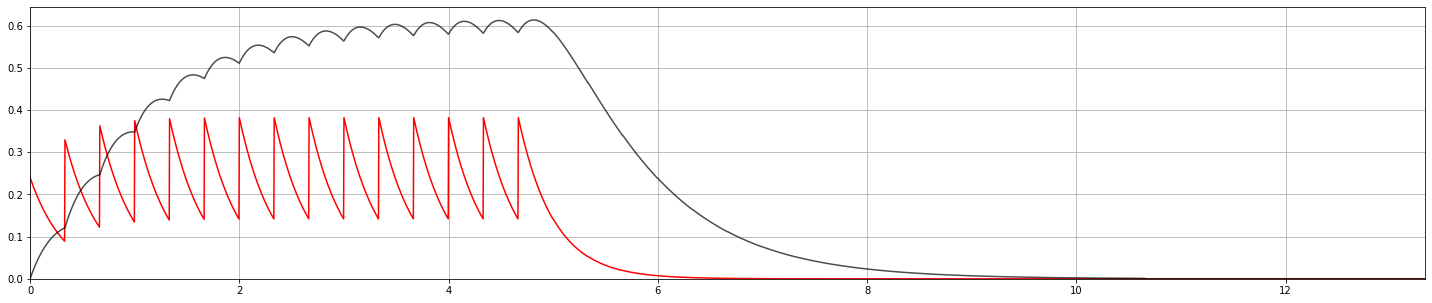

In [360]:
fig, ax = plt.subplots(figsize=(25,5))
plt.plot(tz, yz, 'red')
plt.plot( tz, xz, 'black', alpha=0.7)
plt.xlim(0, n*t0)
plt.ylim(0)
plt.grid(True)
# plt.yscale('log')

In [361]:
dosis_desc = 21
ycsol_m = []
c0_c_m = np.array([y0, x0])
dosis_arr_3_m = np.array([np.arange(i*t0, (i*t0) + t0, step) for i in range(n)])


for i in range(len(dosis_arr_3_m)):
    ycsol_m.append(odeint(model, c0_c_m, dosis_arr_3_m[i]))
    c0_c_m = np.array([y0 + ycsol_m[-1][-1][0], x0 + ycsol_m[-1][-1][1]])
    
    if ycsol_m[-1][-1][1] < threshold:
        ycsol_m[-1][-1][1] = 0

    if i >= dosis_desc:
        c0_c_m = np.array([ycsol_m[-1][-1][0], x0 + ycsol_m[-1][-1][1]])

In [362]:
tz_m = np.concatenate(dosis_arr_3_m)
yz_m = np.concatenate(ycsol_m)[ : ,0]
xz_m = np.concatenate(ycsol_m)[ : ,1]

Text(0.5, 0.98, 'Nivel de alcoholemia\n')

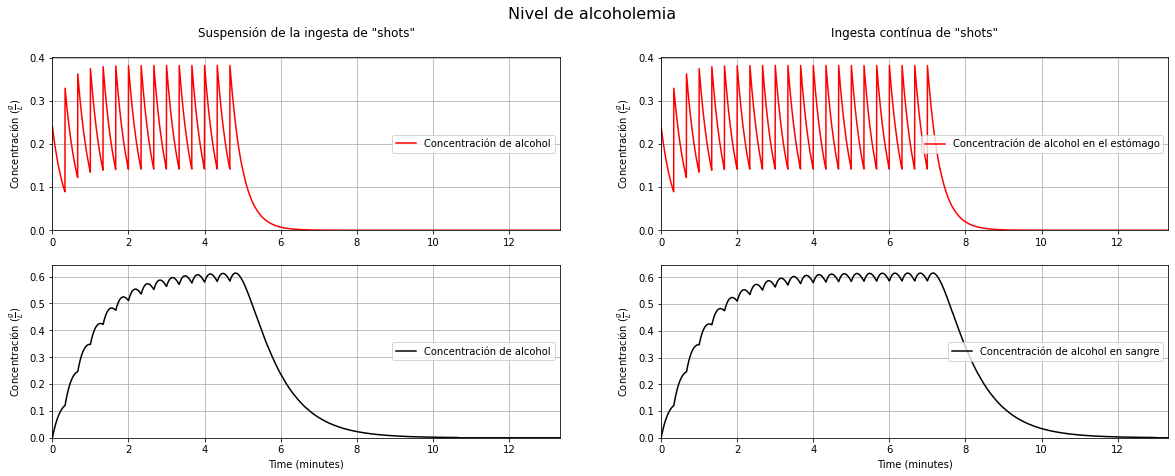

In [373]:
figure, axis = plt.subplots(2, 2, figsize=(20,7))

axis[0, 0].plot(tz, yz, color='red', label='Concentración de alcohol')
axis[1, 0].plot(tz, xz, color='black', label='Concentración de alcohol')


axis[0, 1].plot(tz, yz_m, color='red', label='Concentración de alcohol en el estómago')
axis[1, 1].plot(tz, xz_m, color='black', label='Concentración de alcohol en sangre')

# Setting grid and limits
[axis[k, 0].grid(True) for k in range(len(axis))];
[axis[k, 0].set_xlim(0, n*t0) for k in range(len(axis))];
[axis[k, 0].set_ylim(0) for k in range(len(axis))];
[axis[k, 0].legend(loc=5) for k in range(len(axis))];

# Setting grid and limits
[axis[k, 1].grid(True) for k in range(len(axis))];
[axis[k, 1].set_xlim(0, n*t0) for k in range(len(axis))];
[axis[k, 1].set_ylim(0) for k in range(len(axis))];
[axis[k, 1].legend(loc=5) for k in range(len(axis))];

# Setting X Labels

#Setting Y Labels
axis[0, 0].set_ylabel(r'Concentración $(\frac{g}{L})$')
axis[1, 0].set_ylabel(r'Concentración $(\frac{g}{L})$')
axis[0, 1].set_ylabel(r'Concentración $(\frac{g}{L})$')
axis[1, 1].set_ylabel(r'Concentración $(\frac{g}{L})$')

axis[1, 0].set_xlabel('Time (minutes)')
axis[1, 1].set_xlabel('Time (minutes)')

# Setting titles
axis[0, 0].set_title('\nSuspensión de la ingesta de "shots"\n')
axis[0, 1].set_title('\nIngesta contínua de "shots"\n')

# Setting main title
figure.suptitle('Nivel de alcoholemia\n', fontsize=16)